# Price predictions for farmland in California

In [47]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import datetime as dt
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'fbprophet'

In [48]:
# Loading value_per_acre.csv file from data folder
value_per_acre_df= pd.read_csv("./data/value_per_acre.csv")
value_per_acre_df.tail()

,Unnamed: 0,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
43,2017,3170,NaN,7720,2730,11630,2070,7630,7960,6940,...,3200,3730,1850,3690,7630,4730,2660,3250,4870,1460
44,2018,3300,NaN,7610,2780,12170,2100,7650,8120,7040,...,3120,3830,1890,3830,7650,4760,2630,3250,4740,1490
45,2019,3430,NaN,7600,2850,12830,2160,7900,8600,7190,...,3130,3910,1930,3970,7900,4720,2630,3280,4850,1520
46,2020,3500,NaN,7650,2880,12900,2200,7900,8600,7190,...,3030,3990,2030,4040,7900,4680,2610,3270,4770,1540
47,2021,3550,NaN,7700,2930,13860,2240,8770,8600,7300,...,3390,4130,2150,4190,8770,4790,2700,3330,5280,1600


In [49]:
# Renaming unnamed column to "Year"
value_per_acre_df=value_per_acre_df.rename(columns={"Unnamed: 0": "Year"})

In [50]:
# Displaying the dataframe
value_per_acre_df.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1850,5,NaN,0,6,1,0,31,20,4,...,0,5,1,7,15,8,0,-,10,0
1,1860,9,NaN,0,10,6,0,36,31,6,...,0,13,3,15,22,12,6,-,17,0
2,1870,4,NaN,6,4,12,8,42,36,3,...,0,9,3,12,25,9,6,10,21,3
3,1880,4,NaN,8,6,16,22,49,34,6,...,5,10,5,21,22,11,10,13,23,7
4,1890,6,NaN,6,8,33,18,42,38,20,...,9,12,8,21,18,13,20,15,28,8


In [51]:
# Selecting the historcial prices of the farmland in California over the last 20 years
california_df= value_per_acre_df.loc[26:,["Year", "California"]]
california_df.head()

,Year,California
26,2000,5960
27,2001,5870
28,2002,5730
29,2003,5920
30,2004,6020


In [52]:
# Setting index to "Year"
california_df=california_df.set_index("Year")
california_df.head()

,California
Year,
2000,5960
2001,5870
2002,5730
2003,5920
2004,6020


In [53]:
# Calculating annual returns of the farmland in California over the last 20 years
annual_returns_california= california_df.pct_change().dropna()
annual_returns_california.head()

,California
Year,
2001,-0.015101
2002,-0.023850
2003,0.033159
2004,0.016892
2005,0.367110


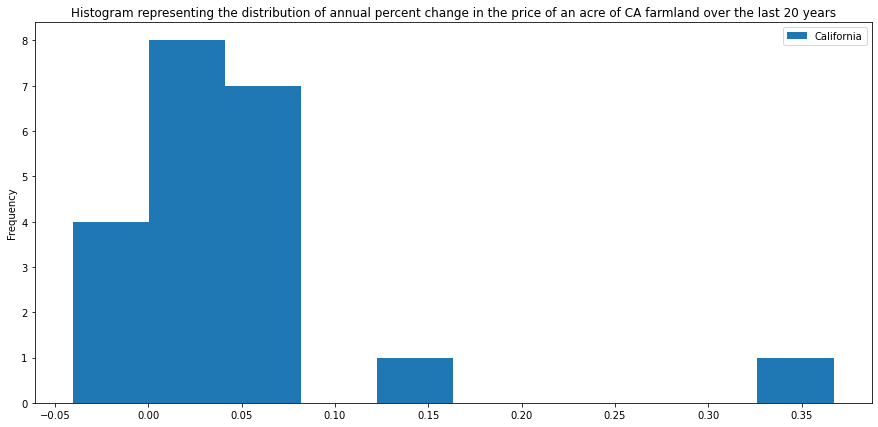

In [54]:
# Visualising distribution of annual percent change in prices of the farmland prices in California using histogram
annual_returns_california.plot(kind= "hist", 
                               title= "Histogram representing the distribution of annual percent change in the price of an acre of CA farmland over the last 20 years",
                               figsize=(15,7))

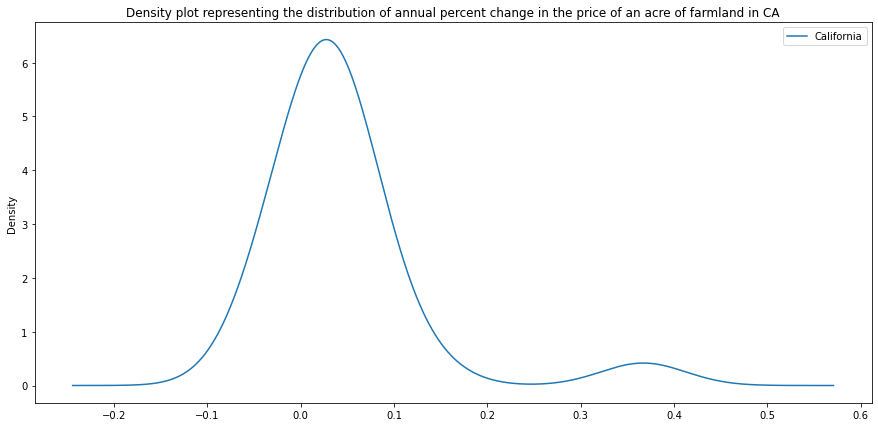

In [55]:
# Density plot
annual_returns_california.plot.density( figsize= (15,7),
                                       title= "Density plot representing the distribution of annual percent change in the price of an acre of farmland in CA")

In [56]:
# Calculating cumulative returns of the farmland in CA
cumulative_returns= (1 + annual_returns_california).cumprod()

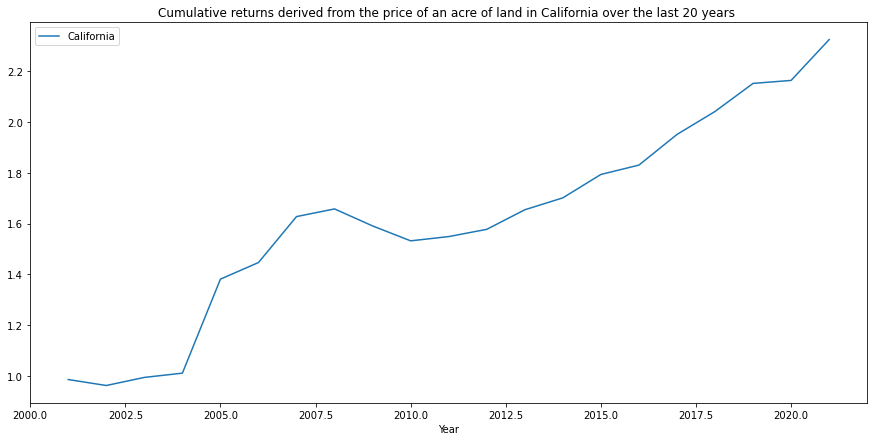

In [57]:
# Visualising cumulative returns
cumulative_returns.plot(figsize=(15,7), title= "Cumulative returns derived from the price of an acre of land in California over the last 20 years ")

In [58]:
# Generating summary statistics
summary_statistics_california= annual_returns_california.describe()
summary_statistics_california

,California
count,21.000000
mean,0.043814
std,0.083658
min,-0.040486
25%,0.010953
50%,0.028398
75%,0.054232
max,0.367110


In [60]:
lower_bound= (summary_statistics_california.iloc[1] - (1.96 * summary_statistics_california.iloc[4])) *100
upper_bound= (summary_statistics_california.iloc[1] + (1.96 * summary_statistics_california.iloc[4])) *100
display(lower_bound)
display(upper_bound)

California    2.234641
dtype: float64

California    6.528179
dtype: float64

### From the analysis of the CA farmland historical annual returns data over the last 20years, with a 95% confidence we can say that we can expect our yearly return value to fall between: 2.23 % and 6.52 %


In [61]:
# Reseting index for the Prophet Analysis
california_df=california_df.reset_index()

In [62]:
# Rename the columns to the Prophet model syntax 
california_df = california_df.rename(columns={"Year":"ds", "California":"y"})

# Review the DataFrame
california_df.head()

,ds,y
0,2000,5960
1,2001,5870
2,2002,5730
3,2003,5920
4,2004,6020


In [63]:
# Creating a Prophet model for the price prediction of the farmland in California
model = Prophet()

NameError: name 'Prophet' is not defined

In [64]:
# Fitting the Prophet model
model.fit(california_df)

NameError: name 'model' is not defined

In [65]:
# Forecast 10 years of farmland prices in California
future_farmland_prices_california = model.make_future_dataframe(periods=62, freq="Y")

# Display the last five rows of the DataFrame
future_farmland_prices_california.tail()

NameError: name 'model' is not defined

In [ ]:
# Making predictions using the future_farmland_prices DataFrame
forecast_farmland_prices_california = model.predict(future_farmland_prices_california)

# Display the first five rows of the forecast_canada DataFrame
forecast_farmland_prices_california.head()

In [ ]:
# Ploting the Prophet predictions  
model.plot(forecast_farmland_prices_california)

In [ ]:
# Setting the index in the forecast_farmland_prices_california DataFrame to the ds datetime column 
forecast_farmland_prices_california = forecast_farmland_prices_california.set_index('ds')

# Display the forecast_canada DataFrame
forecast_farmland_prices_california.head()



In [ ]:
# Plot predictions for our forecast_famrland_prices_california DataFrame for the 10 year period 
forecast_farmland_prices_california[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-50:,:].plot(title= "Forcast of the farmland prices in California (in USD)")


In [ ]:
# Reseting the index in the forecast_farmland_prices_california DataFrame
forecast_farmland_prices_california = forecast_farmland_prices_california.reset_index()

# Using the plot_components function to visualize the forecast results 

fig = model.plot_components(forecast_farmland_prices_california)